### Bike Sharing Assignment

#### Problem Statement


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

We have to build a multiple linear regression model for the prediction of demand for shared bikes. 

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing all required packages


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("deep"))


## Step 1: Reading and Understanding the Data

In [3]:
# Read the given CSV file
# update csv path based on file location
bikes = pd.read_csv("day.csv")

#checking first 5 rows of the data set
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check the descriptive information
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#check the rows and columns count
bikes.shape

(730, 16)

In [6]:
# checking if the data set has null values
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### From the above info we understand that we do not have missing values, however the column dteday is object datatye

In [7]:
#Get basic idea of data using describe()
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data Cleaning

In [8]:
#instant is an index column so we drop it
bikes.drop(['instant'],axis=1,inplace=True)

In [9]:
bikes.shape

(730, 15)

In [10]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### we see that dteday column has same data as yr and mnth column, hence dropping the column dteday to avoid confusion

In [11]:
# dropping dteday column
bikes.drop(['dteday'],axis=1,inplace=True)


In [12]:
bikes.shape

(730, 14)

### cnt: count of total rental bikes including both casual and registered

In [13]:
# deleting casual and registered columns as we know cnt = casual+resgistered and cnt is target variable
bikes = bikes.drop(['casual', 'registered'], axis=1)

In [14]:
bikes.shape

(730, 12)

In [15]:
# checking datatypes
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [16]:
# we see that season,weekday,mnth and,weathersit are categorical variable, hence changing it with appropriate values

## yr, holiday, workingday are having binary values. So we will not map these columns
# replacing the appropriate values for season column as per data dictionary


bikes['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"}, inplace=True)
bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [17]:
# cross checking if the values are replaced correctly
bikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [18]:
# replacing the appropriate value for weathersit column 
bikes['weathersit'].replace({1:"Clear_Clouds",2:"Mist_Cloudy",3:"Light_Thunderstorm_Scattered_clouds",4:'Heavy_Rain_Ice_Pallets_Thunderstorm'},inplace=True)
bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear_Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,6,0,Clear_Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,0,0,Mist_Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,1,1,Mist_Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,2,1,Clear_Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,3,1,Clear_Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [19]:
# replacing the appropriate values for weekday column as per data dictionary
bikes['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Saturday,0,Clear_Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Sunday,0,Mist_Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Monday,1,Mist_Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Tuesday,1,Clear_Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Wednesday,1,Clear_Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [20]:
# replacing the appropriate values for weekday column as per data dictionary
bikes['mnth'].replace({1:"January",2:"Feb",3:"March",4:"April",5:"May",6:"June",7:"July", 8:"August",9:"September", 10:"October",11:"November", 12:"December"},inplace=True)
bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,January,0,Saturday,0,Clear_Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,January,0,Sunday,0,Mist_Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,January,0,Monday,1,Mist_Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,January,0,Tuesday,1,Clear_Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,January,0,Wednesday,1,Clear_Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [21]:
# checking the datatypes
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## EDA 

## Step 3:  Visualising the Data

<b>

If there is some obvious multicollinearity going on, this is the first place to catch it.
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

</b>

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

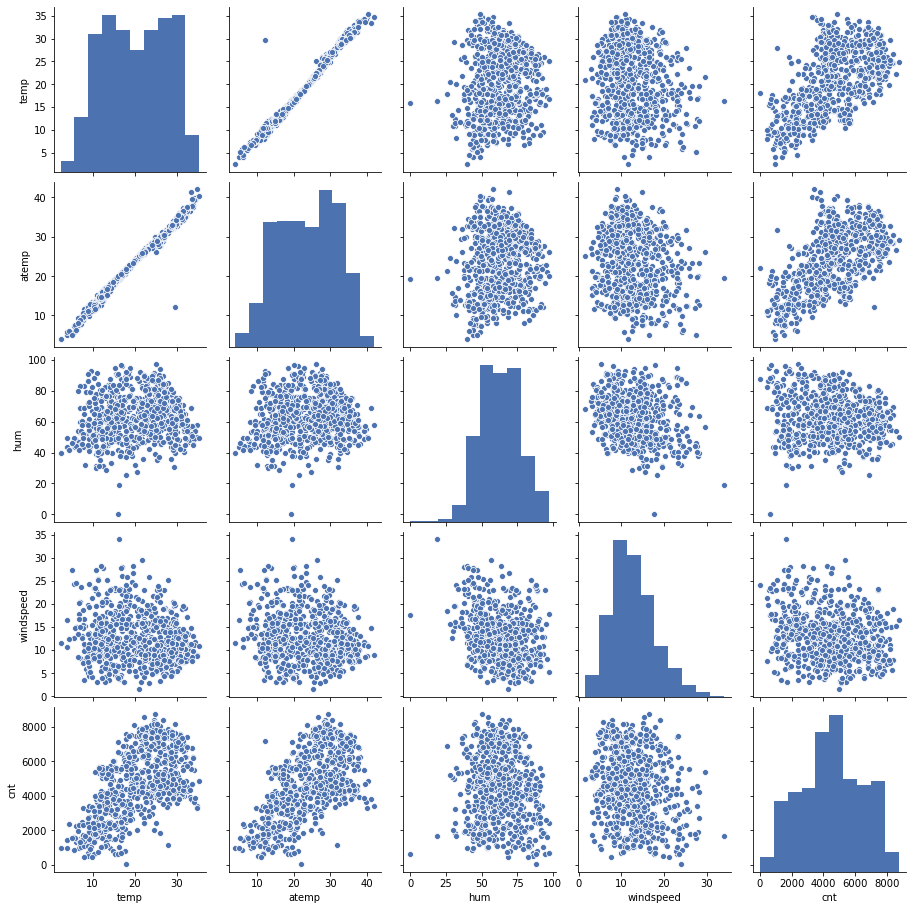

In [22]:
sns.pairplot(bikes, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

### From above pairplot we see atemp and temp have a relationship

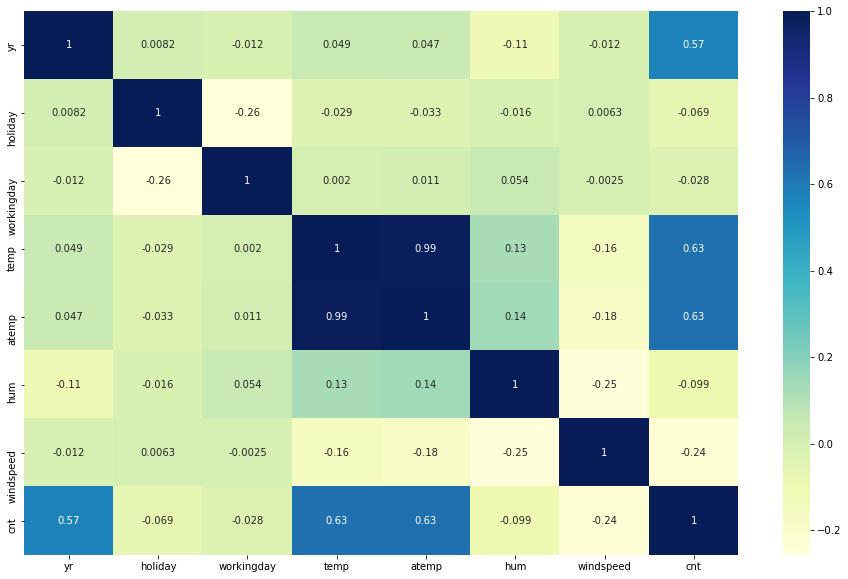

In [23]:
# checking the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(bikes.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [24]:
#correlation between temp and atemp  is almost 1
#Let us drop atemp and consider temp

bikes.drop(['atemp'],axis=1,inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_Clouds,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_Clouds,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_Clouds,9.305237,43.6957,12.522300,1600


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [25]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


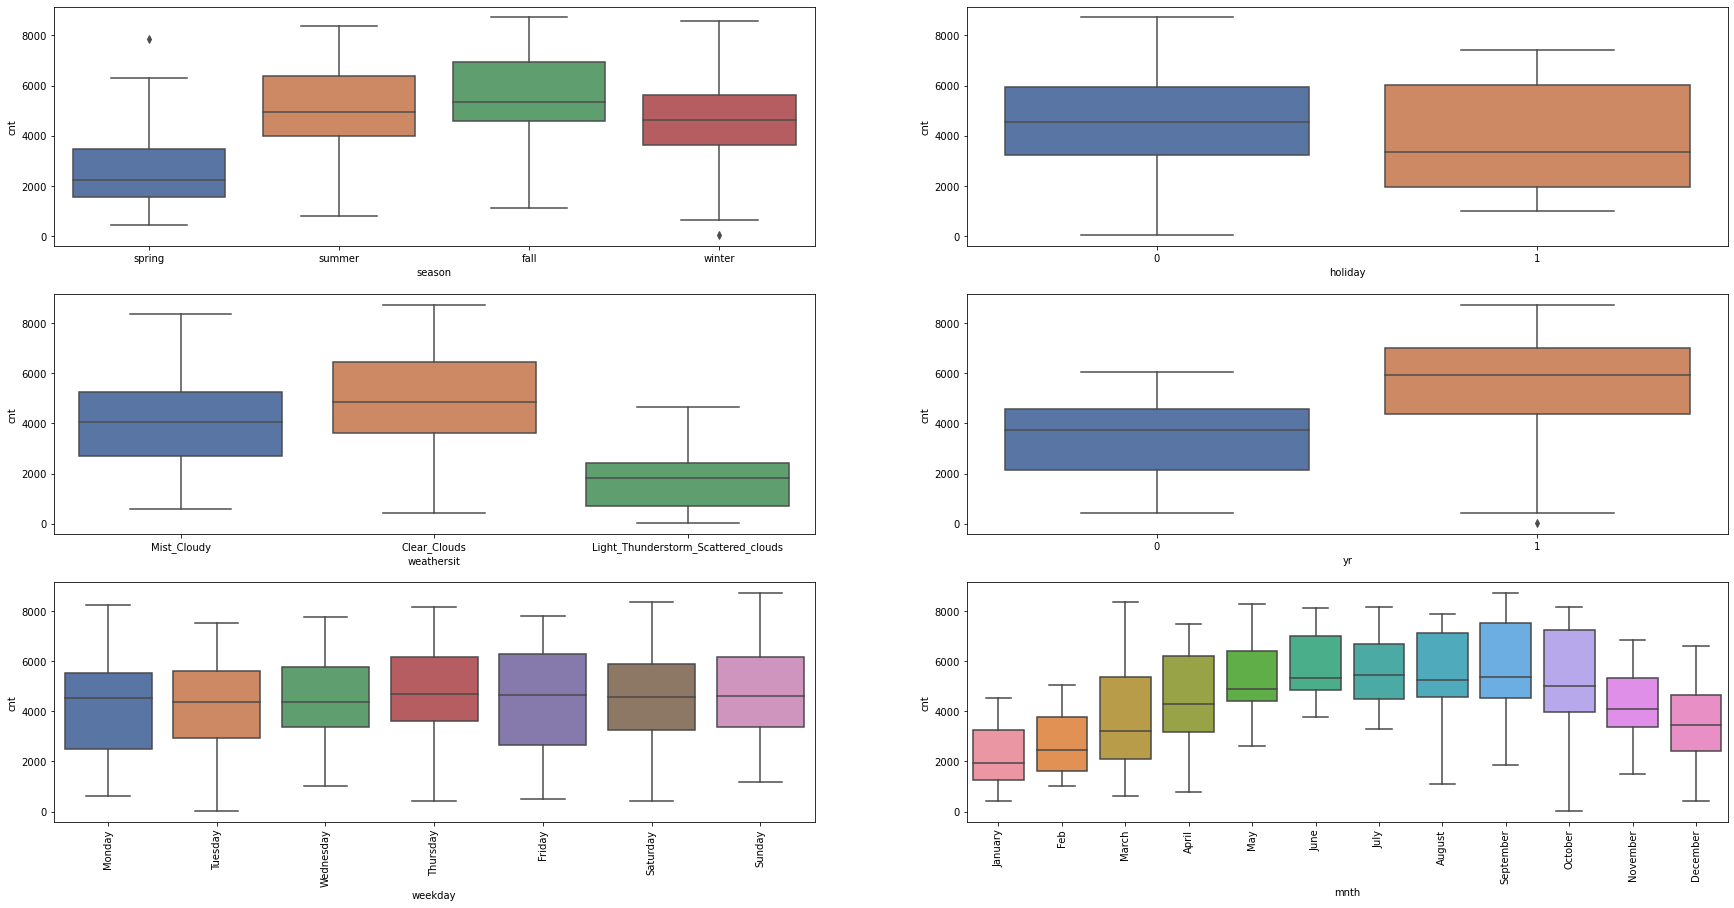

In [26]:
plt.figure(figsize=(30, 15))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)

plt.subplot(3,2,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)


plt.subplot(3,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)

plt.subplot(3,2,4)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)


plt.subplot(3,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.xticks(rotation=90)

plt.subplot(3,2,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.xticks(rotation=90);
plt.show()

### From the above graphs we see that:
*  season: The demads of bikes is less in spring season compared to other seasons
*  holidays: Demands of bikes is less during holidays
*  weathersit: Demands are high when the weather is clear with few clouds. Demands are very less during `Thunderstrom\Light Rain\Light   Snow`   compared to `Mist cloudy`.We do not see any demands of bikes during `Heavy rains + Ice Pallets + Thunderstorm + Mist, Snow + Fog`
* yr: Demands of bikes are high in the year 2019
* weekday: Demands of bikes is almost similar during weekday
* mnth: January month has the lowerst bike demands and months March, June, July, September, October has the highest bike demands


In [27]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


## Step 4: Data Preparation

### Dummy Variables
##### 1.  creating dummy variables for columns `season`, `weathersit`,`weekday` and `mnth`

In [28]:
#creating dummy variables for columns 

season_types=pd.get_dummies(bikes['season'],drop_first=True)
weather_types=pd.get_dummies(bikes['weathersit'],drop_first=True)
day_of_week=pd.get_dummies(bikes['weekday'],drop_first=True)
month=pd.get_dummies(bikes['mnth'],drop_first=True)

In [29]:
bikes.shape

(730, 11)

In [30]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_Clouds,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_Clouds,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_Clouds,9.305237,43.6957,12.522300,1600


In [31]:
# Add the results to the original bikes dataframe
bikes=pd.concat([bikes,season_types],axis=1)
bikes=pd.concat([bikes,weather_types],axis=1)
bikes=pd.concat([bikes,day_of_week],axis=1)
bikes=pd.concat([bikes,month],axis=1)
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   season                               730 non-null    object 
 1   yr                                   730 non-null    int64  
 2   mnth                                 730 non-null    object 
 3   holiday                              730 non-null    int64  
 4   weekday                              730 non-null    object 
 5   workingday                           730 non-null    int64  
 6   weathersit                           730 non-null    object 
 7   temp                                 730 non-null    float64
 8   hum                                  730 non-null    float64
 9   windspeed                            730 non-null    float64
 10  cnt                                  730 non-null    int64  
 11  spring                          

In [32]:
#Deleting the orginal columns season.weathersit,weekday,mnth as we have created the dummies for it
bikes.drop(['season'],axis=1,inplace=True)
bikes.drop(['weathersit'],axis=1,inplace=True)
bikes.drop(['weekday'],axis=1,inplace=True)
bikes.drop(['mnth'],axis=1,inplace=True)


bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,December,Feb,January,July,June,March,May,November,October,September
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   yr                                   730 non-null    int64  
 1   holiday                              730 non-null    int64  
 2   workingday                           730 non-null    int64  
 3   temp                                 730 non-null    float64
 4   hum                                  730 non-null    float64
 5   windspeed                            730 non-null    float64
 6   cnt                                  730 non-null    int64  
 7   spring                               730 non-null    uint8  
 8   summer                               730 non-null    uint8  
 9   winter                               730 non-null    uint8  
 10  Light_Thunderstorm_Scattered_clouds  730 non-null    uint8  
 11  Mist_Cloudy                     

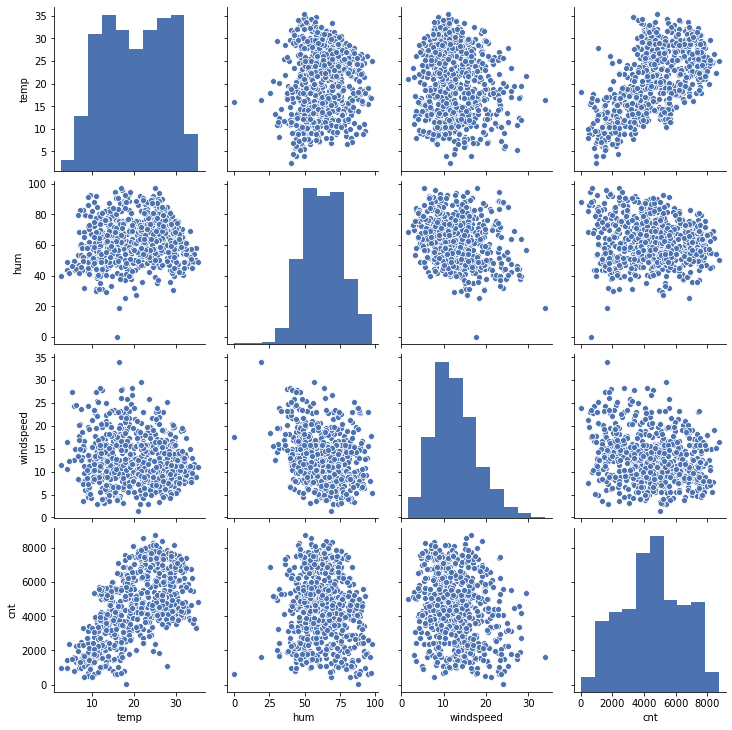

In [34]:
# pair plot for numerical variables to check the highest correlation 
sns.pairplot(bikes, vars=['temp','hum','windspeed',"cnt"])
plt.show()

#### From the graph we can infer that column temp has the highest correlation with the target variable cnt

## Step 5: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [35]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
# checking the rows and columns counts in train and test data set
print(bikes_train.shape)
print(bikes_test.shape)

(510, 29)
(219, 29)


In [37]:
bikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,December,Feb,January,July,June,March,May,November,October,September
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
bikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,December,Feb,January,July,June,March,May,November,October,September
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Rescaling the Features 


In [39]:
# importing the library for scaling
from sklearn.preprocessing import MinMaxScaler

In [40]:
# scaling numerical data
scaler = MinMaxScaler()

In [41]:
bikes_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Light_Thunderstorm_Scattered_clouds',
       'Mist_Cloudy', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'August', 'December', 'Feb', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September'],
      dtype='object')

In [42]:
# Apply scaler() to all the numeric variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])

In [43]:
bikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,December,Feb,January,July,June,March,May,November,October,September
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
bikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,December,Feb,January,July,June,March,May,November,October,September
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


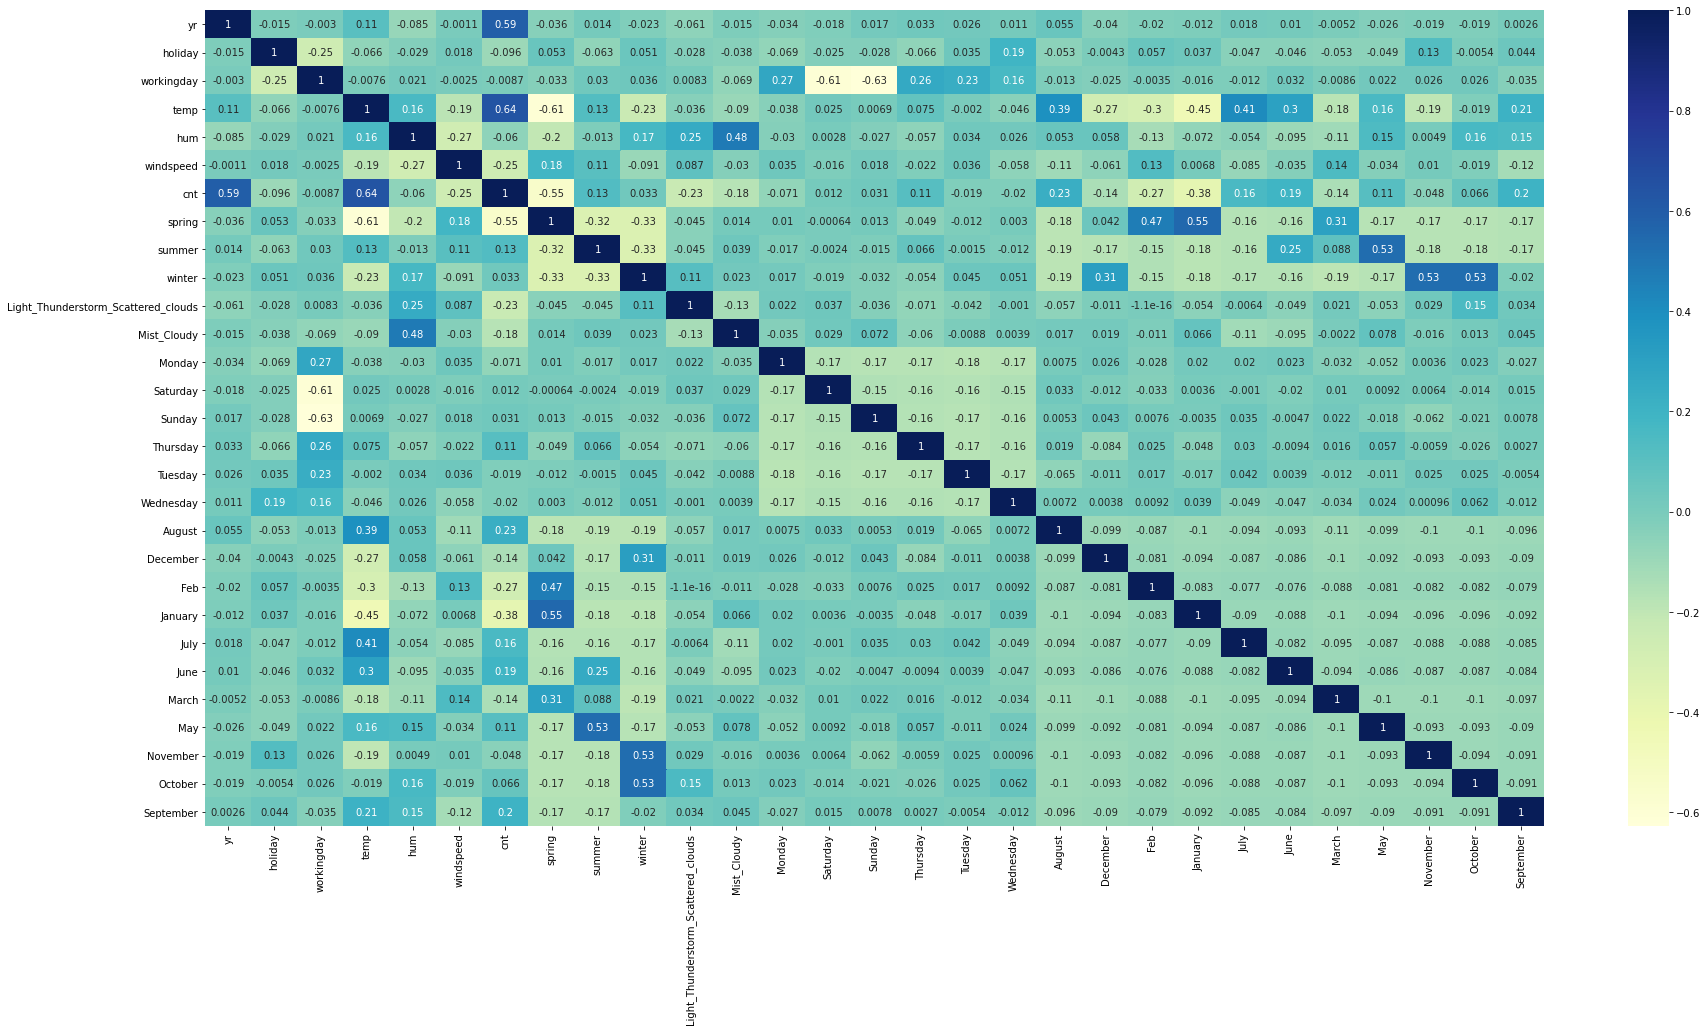

In [45]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 15))
sns.heatmap(bikes_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### As you might have noticed, temp seems to the correlated to cnt the most. Let's see a pairplot for temp vs cnt.

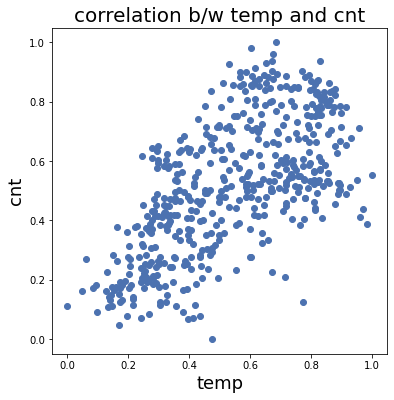

In [46]:
plt.figure(figsize=[6,6])
plt.scatter(bikes_train.temp, bikes_train.cnt)
plt.title('correlation b/w temp and cnt', fontsize = 20)                  # Plot heading 
plt.xlabel('temp', fontsize = 18)  
plt.ylabel('cnt', fontsize = 18) 
plt.show()

## Step 6: Building a linear model

### Dividing into X and Y sets for the model building

In [47]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [48]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light_Thunderstorm_Scattered_clouds,...,December,Feb,January,July,June,March,May,November,October,September
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64



we will be using the **LinearRegression function from SciKit Learn** for its compatibility with **RFE** (which is a utility from sklearn)

In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light_Thunderstorm_Scattered_clouds', True, 1),
 ('Mist_Cloudy', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10),
 ('August', False, 9),
 ('December', True, 1),
 ('Feb', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 14),
 ('May', False, 6),
 ('November', True, 1),
 ('October', False, 11),
 ('September', True, 1)]

In [53]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Light_Thunderstorm_Scattered_clouds', 'Mist_Cloudy',
       'December', 'January', 'July', 'November', 'September'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'August', 'Feb', 'June', 'March', 'May', 'October'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [55]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### MODEL 1

In [56]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
9,Mist_Cloudy,2.32
0,yr,2.09
13,November,1.83
11,January,1.75


In [57]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm1 = sm.OLS(y_train, X_train_lm1).fit()

In [58]:
# Check the parameters obtained

lm1.params

const                                  0.320243
yr                                     0.230328
holiday                               -0.091228
temp                                   0.479977
hum                                   -0.160227
windspeed                             -0.188457
spring                                -0.061737
summer                                 0.040767
winter                                 0.103435
Light_Thunderstorm_Scattered_clouds   -0.248116
Mist_Cloudy                           -0.055876
December                              -0.037199
January                               -0.043748
July                                  -0.055495
November                              -0.040949
September                              0.074891
dtype: float64

In [59]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.34e-189
Time:                        15:18:37   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

### Model 1: Observation
<b>
    
R-squared = `0.845`
    
Adjusted R-squared = `0.841`
    
High VIF = hum  `30.94`
    
High p-value = December `0.032`
</b>

## Model 2

In [60]:
# Removing variable hum based on High VIF
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [61]:
# VIF check 
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
12,November,1.80
10,January,1.66
11,July,1.59
8,Mist_Cloudy,1.56


In [62]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lm2 = sm.OLS(y_train, X_train_lm2).fit()

In [63]:
# Check the parameters obtained

lm2.params

const                                  0.246635
yr                                     0.234287
holiday                               -0.091915
temp                                   0.437655
windspeed                             -0.158596
spring                                -0.071640
summer                                 0.033271
winter                                 0.088652
Light_Thunderstorm_Scattered_clouds   -0.292892
Mist_Cloudy                           -0.081442
December                              -0.044529
January                               -0.050270
July                                  -0.050376
November                              -0.041852
September                              0.068219
dtype: float64

In [64]:
# Print a summary of the linear regression model obtained
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.57e-186
Time:                        15:18:39   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

### Model 2: Observations


<b>
    
R-squared = `0.840`
    
Adjusted R-squared = `0.835`
    
High VIF = temp  `5.17`
    
High p-value = summer `0.032`
    
</b>

## Model 3

In [65]:
# Removing variable summer based on the p-value
X_train_new = X_train_new.drop(["summer"], axis = 1)

In [66]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.54
4,spring,2.36
0,yr,2.06
11,November,1.80
9,January,1.65
7,Mist_Cloudy,1.53
8,December,1.46
10,July,1.36


In [67]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lm3 = sm.OLS(y_train, X_train_lm3).fit()

In [68]:
# Check the parameters obtained

lm3.params

const                                  0.289327
yr                                     0.234795
holiday                               -0.091280
temp                                   0.402583
windspeed                             -0.154010
spring                                -0.103373
winter                                 0.064977
Light_Thunderstorm_Scattered_clouds   -0.294885
Mist_Cloudy                           -0.081190
December                              -0.050984
January                               -0.055626
July                                  -0.064343
November                              -0.048827
September                              0.053670
dtype: float64

In [69]:
# Print a summary of the linear regression model obtained
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.08e-186
Time:                        15:18:40   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

### Model 3: Observation
<b>
    
R-squared = `0.838`
    
Adjusted R-squared = `0.834`
    
High VIF = temp  `4.67`
    
High p-value = November `0.010`
</b>

## Model 4

In [70]:
# Removing variable November based on the High p-value
X_train_new = X_train_new.drop(["November"], axis = 1)

In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.36
0,yr,2.06
5,winter,1.64
9,January,1.64
7,Mist_Cloudy,1.53
10,July,1.36
8,December,1.29
11,September,1.20


In [72]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lm4 = sm.OLS(y_train, X_train_lm4).fit()

In [73]:
lm4.params

const                                  0.276909
yr                                     0.234754
holiday                               -0.099395
temp                                   0.419961
windspeed                             -0.154174
spring                                -0.099725
winter                                 0.048206
Light_Thunderstorm_Scattered_clouds   -0.290427
Mist_Cloudy                           -0.080239
December                              -0.033983
January                               -0.050552
July                                  -0.067096
September                              0.057528
dtype: float64

In [74]:
# Print a summary of the linear regression model obtained
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.02e-186
Time:                        15:18:41   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

### Model 4: Observations

<b>
    
R-squared = `0.836`
    
Adjusted R-squared = `0.832`
    
High VIF = temp  `4.63`
    
High p-value = December `0.037`
</b>

## Model 5

In [75]:
# Removing variable December based on the High p-value
X_train_new = X_train_new.drop(["December"], axis = 1)

In [76]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.25
0,yr,2.06
8,January,1.60
7,Mist_Cloudy,1.53
5,winter,1.40
9,July,1.36
10,September,1.20
6,Light_Thunderstorm_Scattered_clouds,1.08


In [77]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lm5 = sm.OLS(y_train, X_train_lm5).fit()

In [78]:
# Check the parameters obtained

lm5.params

const                                  0.265709
yr                                     0.234848
holiday                               -0.097732
temp                                   0.433461
windspeed                             -0.148246
spring                                -0.101338
winter                                 0.043231
Light_Thunderstorm_Scattered_clouds   -0.287686
Mist_Cloudy                           -0.080173
January                               -0.042689
July                                  -0.069264
September                              0.058652
dtype: float64

In [79]:
# Print a summary of the linear regression model obtained
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.13e-186
Time:                        15:18:42   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

### Model 5: Observations
<b>
    
R-squared = `0.835`
    
Adjusted R-squared = `0.831`
    
VIF = temp  `4.63`
    
High p-value = January `0.018`
</b>

## Model 6

In [80]:
# Removing variable January based on the High p-value
X_train_new = X_train_new.drop(["January"], axis = 1)

In [81]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,spring,1.65
7,Mist_Cloudy,1.51
5,winter,1.40
8,July,1.35
9,September,1.20
6,Light_Thunderstorm_Scattered_clouds,1.08
1,holiday,1.04


In [82]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lm6 = sm.OLS(y_train, X_train_lm6).fit()

In [83]:
# Check the parameters obtained

lm6.params

const                                  0.251899
yr                                     0.234092
holiday                               -0.098556
temp                                   0.451455
windspeed                             -0.139817
spring                                -0.110795
winter                                 0.047278
Light_Thunderstorm_Scattered_clouds   -0.286408
Mist_Cloudy                           -0.081133
July                                  -0.072719
September                              0.057705
dtype: float64

In [84]:
# Print a summary of the linear regression model obtained
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.16e-186
Time:                        15:18:43   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

### Model 6: Observations

<b>
    
R-squared = `0.833`
    
Adjusted R-squared = `0.830`

We observe from model 6 all the columns have VIF less that 5 and no p-value > 0.05
</b>

From the lm6 model summary, it is evident that all our coefficients are not equal to zero. which means We REJECT the NULL HYPOTHESIS 

## STEP 7 : VALIDATE ASSUMPTIONS

### Residual Analysis of the train data

##### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.



In [85]:
y_train_cnt = lm6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

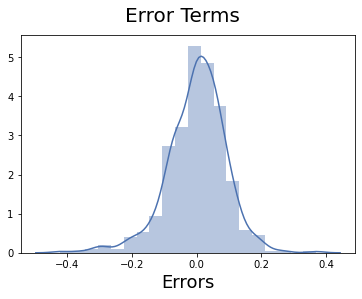

In [86]:
res = y_train-y_train_cnt

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### There is no multicollinearity observered as VIF is less than 5

In [87]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,spring,1.65
7,Mist_Cloudy,1.51
5,winter,1.40
8,July,1.35
9,September,1.20
6,Light_Thunderstorm_Scattered_clouds,1.08
1,holiday,1.04


### validate the assumptions of Linear Regression
* The distribution plot show normal distribution with mean 0
* no multicollinearity between predicted variables and the VIF is less than 5


## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. sixth model.

#### Applying the scaling on the test sets

In [88]:
# Apply scaler() to all the numeric variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])

In [89]:
bikes_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,December,Feb,January,July,June,March,May,November,October,September
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [90]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [91]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   yr                                   219 non-null    int64  
 1   holiday                              219 non-null    int64  
 2   workingday                           219 non-null    int64  
 3   temp                                 219 non-null    float64
 4   hum                                  219 non-null    float64
 5   windspeed                            219 non-null    float64
 6   spring                               219 non-null    uint8  
 7   summer                               219 non-null    uint8  
 8   winter                               219 non-null    uint8  
 9   Light_Thunderstorm_Scattered_clouds  219 non-null    uint8  
 10  Mist_Cloudy                          219 non-null    uint8  
 11  Monday                         

In [92]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter',
       'Light_Thunderstorm_Scattered_clouds', 'Mist_Cloudy', 'July',
       'September'],
      dtype='object')

In [93]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   const                                219 non-null    float64
 1   yr                                   219 non-null    int64  
 2   holiday                              219 non-null    int64  
 3   temp                                 219 non-null    float64
 4   windspeed                            219 non-null    float64
 5   spring                               219 non-null    uint8  
 6   winter                               219 non-null    uint8  
 7   Light_Thunderstorm_Scattered_clouds  219 non-null    uint8  
 8   Mist_Cloudy                          219 non-null    uint8  
 9   July                                 219 non-null    uint8  
 10  September                            219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(

In [94]:
# Making predictions using the final model (lm6)

y_pred = lm6.predict(X_test_lm6)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

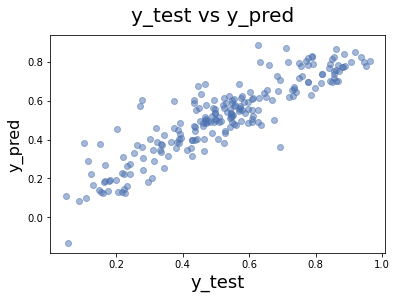

In [95]:
# Plotting y_test and y_pred to understand the spread



fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

#### R-Squared Value for TEST


In [96]:
from sklearn.metrics import r2_score
r2_test=r2_score(y_test, y_pred)
r2_test

0.8070101019557963

#### Adjusted R-Squared Value for TEST

In [97]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

r2_adjusted_test = 1-(1-r2_test)*(n-1)/(n-p-1)
r2_adjusted_test

0.7977317414729018

### Print the R Squared and adj. R Squared for TRAIN and TEST

In [101]:
# Print R Squared and adj. R Squared
print('R- Sqaured train: ', round(lm6.rsquared,3), '  Adj. R-Squared train:', round(lm6.rsquared_adj,4) )
print('R- Sqaured test : ', round(r2_test,3), '  Adj. R-Squared test :', round(r2_adjusted_test,3))

R- Sqaured train:  0.833   Adj. R-Squared train: 0.8295
R- Sqaured test :  0.807   Adj. R-Squared test : 0.798


In [99]:
# Print the coefficents of final model (lm6)
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm6.params,3))


Coefficent for the variables are:
const                                  0.252
yr                                     0.234
holiday                               -0.099
temp                                   0.451
windspeed                             -0.140
spring                                -0.111
winter                                 0.047
Light_Thunderstorm_Scattered_clouds   -0.286
Mist_Cloudy                           -0.081
July                                  -0.073
September                              0.058
dtype: float64


### The equation of our best fitted line is:





### cnt=0.252+(0.234×yr)-(0.099×holiday)+(0.451×temp)−(0.140×windspeed)-(0.111×spring)+(0.047×winter)-(0.286×Light_Thunderstorm_Scattered_clouds)−(0.081×Mist_Cloudy)−(0.073×July)+(0.058*September)
    
</b>

<b>

1. From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain almost 80% of bike demand.
2. Coeffiencients of the variables explains the factors effecting the bike demand
    
</b>

### Top 3 features contributing significantly towards explaining the demand of the shared bikes

<b>
    
1. Temperature - (0.451) : a unit increase in the temp variable, increases the bike hire demands by 0.451 units
2. year - (0.234) : a unit increase in the year variable, increases the bike hire demands by 0.234 units
3. Light_Thunderstorm_Scattered_clouds - (-0.286) :  a unit increase in the Light_Thunderstorm_Scattered_clouds variable, decreases the bike hire demands by 0.286 units
    
</b>